<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python59_babynames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

미국 성별, 연도별 신생아 수의 변화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames
폴더에서 yob[year].txt들을 읽어서 데이터 프레임들을 생성.
* 각 데이터 프레임에 year 변수(컬럼)을 추가.
* 모든 데이터 프레임들을 하나로 합침.

In [2]:
# txt 파일의 컬럼 이름(헤더)
col_names = ['name', 'gender', 'births']

In [5]:
yob_year = []  # 각 연도별 파일에서 생성한 데이터 프레임들을 저장할 리스트
for year in range(1880, 2011):  # 1880년 ~ 2010년 데이터 파일.
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt'
    df = pd.read_csv(file_path, header=None, names=col_names,
                     encoding='cp1252')
    df['year'] = year
    yob_year.append(df)

In [6]:
len(yob_year)

131

In [7]:
yob_year[0]

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [8]:
yob_year[-1]

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [10]:
yob_df = pd.concat(yob_year, ignore_index=True)
yob_df

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


* 성별, 연도별 출생자수(births)의 합계

In [29]:
result = yob_df.groupby(['gender', 'year'])['births'].sum()
result

gender  year
F       1880      90993
        1881      91955
        1882     107851
        1883     112322
        1884     129021
                 ...   
M       2006    2050234
        2007    2069242
        2008    2032310
        2009    1973359
        2010    1898382
Name: births, Length: 262, dtype: int64

In [33]:
result.loc[('M', 1880):('M', 2010)]

gender  year
M       1880     110493
        1881     100748
        1882     113687
        1883     104632
        1884     114445
                 ...   
        2006    2050234
        2007    2069242
        2008    2032310
        2009    1973359
        2010    1898382
Name: births, Length: 131, dtype: int64

In [34]:
# MultiIndex -> columns
result = result.unstack(level=0)
result

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


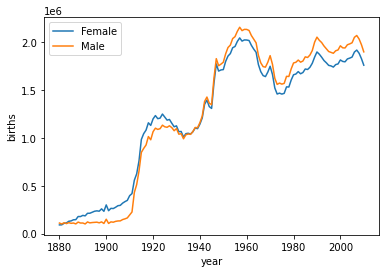

In [27]:
sns.lineplot(x=result.index, y='F', data=result, label='Female')
sns.lineplot(x='year', y='M', data=result, label='Male')

plt.ylabel('births')
plt.show()

In [35]:
yob_pivot_table = yob_df.pivot_table(values='births', 
                                     index='year',
                                     columns='gender',
                                     aggfunc=np.sum)
yob_pivot_table

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
